In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, execute
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit.circuit.library.standard_gates import XGate
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [2]:
# Your token can be found here: https://quantum-computing.ibm.com/
API_TOKEN = "?"

In [3]:
# Save account credentials locally in $HOME/.qiskit/qiskit-ibm.json (you'll need to run this only once!). 
# IBMProvider.save_account(token=API_TOKEN, overwrite=True)

In [4]:
# Load a previously saved account and optionally select a 
# different hub/group/project in case you have access
provider = IBMProvider(instance="ibm-q/open/main")

RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [7]:
# Create a quantum circuit
cr = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.id(qr[1])
qc.h(qr[2])
qc.id(qr[3])
qc.t(qr[4])
qc.ccx(0,1,2)

qc.append(XGate().control(num_ctrl_qubits=1, ctrl_state='1'), [qr[0], qr[1]])
qc.append(XGate().control(num_ctrl_qubits=1, ctrl_state='1'), [qr[2], qr[3]])

# Circuit optimizations, if any, are 
# not applied beyond the barrier
qc.barrier()

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.measure(3, 3)
qc.measure(4, 4)

# Visualize the quantum circuit
qc.draw()

CircuitError: 'duplicate qubit arguments'

In [14]:
# Select quantum device to run on. Select simulator -> True if you want to run on a simulator which is faster
# INSPECT DEVICES YOU HAVE ACCESS TO HERE: https://quantum-computing.ibm.com/services/resources?tab=yours
backends = provider.backends(filters=lambda x: x.configuration().n_qubits >= (len(qc.qubits)) \
    and (x.configuration().simulator == False) and (x.status().operational))
backend = least_busy(backends)
print("Selected the least busy backend: ", backend.name)

Selected the least busy backend:  ibm_kyoto


In [15]:
# Due to a bug in current version of Qiskit, not all simulators can be used here
# In case you want to use a simulator, instead of a real device, UNCOMMENT NEXT LINE
# backend = provider.get_backend("ibmq_qasm_simulator")

In [17]:
# Transpile circuit and send it to a quantum device or to a simulator
# INSPECT YOUR JOBS HERE: https://quantum-computing.ibm.com/jobs
try:
    #transpiled_circuit = transpile(qc, backend=backend, optimization_level=2)
    #job = execute(qc, backend, shots=100)
    #job = backend.run(transpiled_circuit)
    job = backend.run(qc, shots=100)
    print(job)
except Exception as ex:
    print(ex.message)

<IBMCircuitJob('cr81mq21bz60008fcnr0')>


In [ ]:
# Monitor live the job progress
job_monitor(job, interval=3)

Job Status: job is queued (None)

In [93]:
# Print job results
results = job.result()
counts = results.get_counts(transpiled_circuit)
print("\nTotal counts are:", counts)


Total counts are: {'10000': 1, '01101': 1, '00011': 21, '01111': 22, '11100': 1, '10011': 1, '11111': 1, '01100': 21, '00000': 29, '00100': 2}


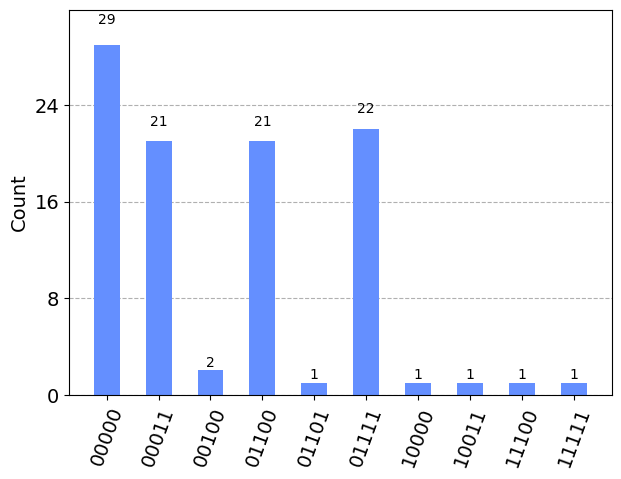

In [94]:
# Plot job results
answer = results.get_counts()
plot_histogram(answer)

In [22]:
from qiskit import transpile
from qiskit.circuit import QuantumRegister, QuantumCircuit, Parameter
from qiskit.circuit.library import MSGate
import qiskit.quantum_info as qi 
import numpy as np
import math

phi0_param = Parameter("phi0_param")
phi1_param = Parameter("phi1_param")
theta_param = Parameter("theta_param")

# op = qi.Operator([math.cos(phi0_param), math.cos(phi0_param)], [math.cos(phi0_param), math.cos(phi0_param)])

cr = ClassicalRegister(2)
qr = QuantumRegister(2)
qc = QuantumCircuit(qr, cr)
qc.append(MSGate(theta=21.1*np.pi, num_qubits=2), [qr[0], qr[1]])

target_basis = ['rx', 'ry', 'rz', 'h', 'cx']
decomposed = transpile(qc,
                       basis_gates=target_basis, 
                       optimization_level=0)
print(decomposed)

       ┌───┐                        ┌───┐
q27_0: ┤ H ├──■──────────────────■──┤ H ├
       ├───┤┌─┴─┐┌────────────┐┌─┴─┐├───┤
q27_1: ┤ H ├┤ X ├┤ Rz(66.288) ├┤ X ├┤ H ├
       └───┘└───┘└────────────┘└───┘└───┘
c14: 2/══════════════════════════════════
                                         


In [95]:
from qiskit.tools.jupyter import *

%qiskit_version_table